In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
products = pd.read_csv('product_descriptions.csv')
train = pd.read_csv('train.csv', encoding='ISO-8859-1')
train = train.set_index('product_uid').join(products.set_index('product_uid'))
train = train.reset_index()

In [3]:
train['nwords'] = train['search_term'].apply(lambda x: len(x.split()))

In [6]:
test = pd.read_csv('test.csv', encoding='ISO-8859-1')
test_search_terms = list(test['search_term'].unique())

In [9]:
print('Number of Products in test: ' , len(test['product_uid'].unique()))
print('Number of Products in train: ', len(train['product_uid'].unique()))
print('Number of Products in common: ', len(set(test['product_uid'].unique()).intersection(set(train['product_uid'].unique()))))

Number of Products in test:  97460
Number of Products in train:  54667
Number of Products in common:  27699


In [8]:
print('Number of search terms in test: ' , len(test_search_terms))
print('Number of search terms in train: ', len(train['search_term'].unique()))
print('Number of search terms in common: ', len(set(test['search_term'].unique()).intersection(set(train['search_term'].unique()))))

Number of search terms in test:  22427
Number of search terms in train:  11795
Number of search terms in common:  9621


Text(0,0.5,'Frequency')

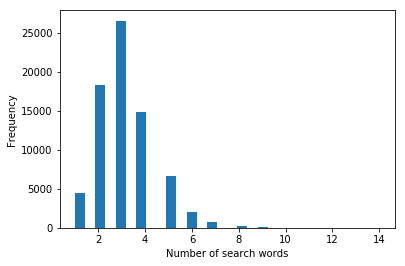

In [4]:
plt.hist(train['nwords'], bins=30)
plt.xlabel('Number of search words')
plt.ylabel('Frequency')

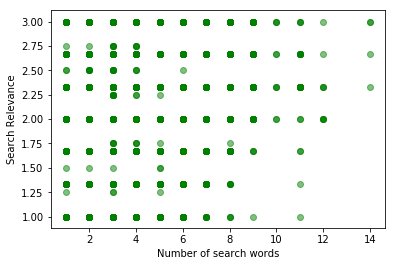

In [10]:
plt.scatter(list(train['nwords']),list(train['relevance']),alpha=0.5,c='green')
plt.xlabel('Number of search words')
plt.ylabel('Search Relevance')
plt.show();

Text(0,0.5,'Frequency')

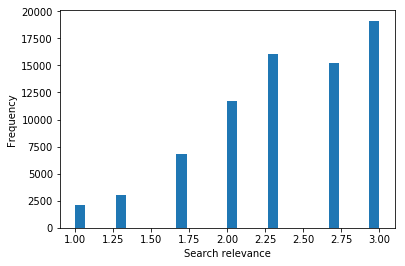

In [11]:
plt.hist(train['relevance'], bins=30)
plt.xlabel('Search relevance')
plt.ylabel('Frequency')

In [12]:
attributes = pd.read_csv('attributes.csv', encoding='ISO-8859-1')


In [13]:
print('height:     ', str(sum(attributes['name'].apply(lambda x: 'height' in str(x).lower()))))
print('width:      ', str(sum(attributes['name'].apply(lambda x: 'width' in str(x).lower()))))
print('length:     ', str(sum(attributes['name'].apply(lambda x: 'length' in str(x).lower()))) )
print('color:      ', str(sum(attributes['name'].apply(lambda x: 'color' in str(x).lower()))) )
print('material:   ', str(sum(attributes['name'].apply(lambda x: 'material' in str(x).lower()))) )
print('type:       ' , str(sum(attributes['name'].apply(lambda x: 'type' in str(x).lower()))))
print('Total Rows: ' , len(attributes))

height:      97210
width:       111194
length:      47012
color:       106895
material:    63063
type:        177192
Total Rows:  2044803


In [14]:
attr_count = attributes[attributes['value'].notnull() & attributes['value']!=0 ].groupby(by = 'product_uid').count()
attr_count.sort_values(by = 'product_uid')
attr_count = attr_count.reset_index()

In [16]:
train = train.set_index('product_uid').join(attr_count.set_index('product_uid'))
train = train.reset_index()

In [17]:
train.head(2)

,product_uid,id,product_title,search_term,relevance,product_description,nwords,name,value
0,100001,2,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,"Not only do angles make joints stronger, they ...",2,15.0,15.0
1,100001,3,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5,"Not only do angles make joints stronger, they ...",2,15.0,15.0


In [19]:
train = train.drop(columns='value')
train = train.rename(columns={'name':'num_attribs'})

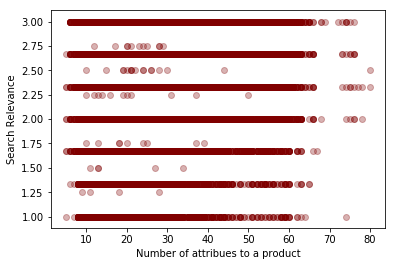

In [31]:
plt.scatter(list(train['num_attribs']),list(train['relevance']),alpha=0.3,c='maroon')
plt.xlabel('Number of attribues to a product')
plt.ylabel('Search Relevance')
plt.show();

In [33]:
train.head(2)

,product_uid,id,product_title,search_term,relevance,product_description,nwords,num_attribs
0,100001,2,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.0,"Not only do angles make joints stronger, they ...",2,15.0
1,100001,3,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.5,"Not only do angles make joints stronger, they ...",2,15.0


In [35]:
attr_brand = attributes[(attributes['name'].str.lower().str.contains('brand')==True) & attributes['value'].notnull()]


In [ ]:
train = train.set_index('product_uid').join(attr_brand.set_index('product_uid'))
train = train.reset_index()

In [38]:
train = train.drop(columns='name')
train = train.rename(columns={'value':'brand'})

### Mean Relevance for products with brand names

In [41]:
np.mean(train[train['brand'].notnull()]['relevance'])

2.3362058329620314

### Mean Relevance for products without brand names

In [42]:
np.mean(train[-train['brand'].notnull()]['relevance'])

2.5210389241942153